In [ ]:
%pip install missingno

In [ ]:
%pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=26fdf1f32ec95d541d96a82dbe07e5f46fbc6b2f09fe6cab0915566227822ec1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [ ]:
import missingno as msno
from ydata_profiling import ProfileReport

In [ ]:
from sklearn.preprocessing import LabelEncoder # convierte el texto a numeros
from sklearn.svm import SVC #maquina soporte vectorial
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd
from joblib import dump, load

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets_pandas_scikit_learn_spark-master/piel.csv', sep=',', header=0)
df.head()

,Age At Procurement,Mutation Count,Mutation Status,Person Gender,Primary Tumor Site,Sample Type,Specimen Site,Tissue Source Site,Type
0,85.0,NaN,WT,Male,head/neck,primary,head/neck,Tumor,sun-exposed
1,NaN,288.0,NRAS-Q61R,Female,extremity,metastasis,extremity,Cell line,sun-exposed
2,65.0,155.0,BRAF-V600K,Male,head/neck,metastasis,trunk,Tumor,sun-exposed
3,68.0,1.0,WT,Male,head/neck,primary,head/neck,Tumor,sun-exposed
4,58.0,2.0,WT,Female,head/neck,primary,head/neck,Tumor,sun-exposed


In [ ]:
df.dtypes

Age At Procurement    float64
Mutation Count        float64
Mutation Status        object
Person Gender          object
Primary Tumor Site     object
Sample Type            object
Specimen Site          object
Tissue Source Site     object
Type                   object
dtype: object

<Axes: >

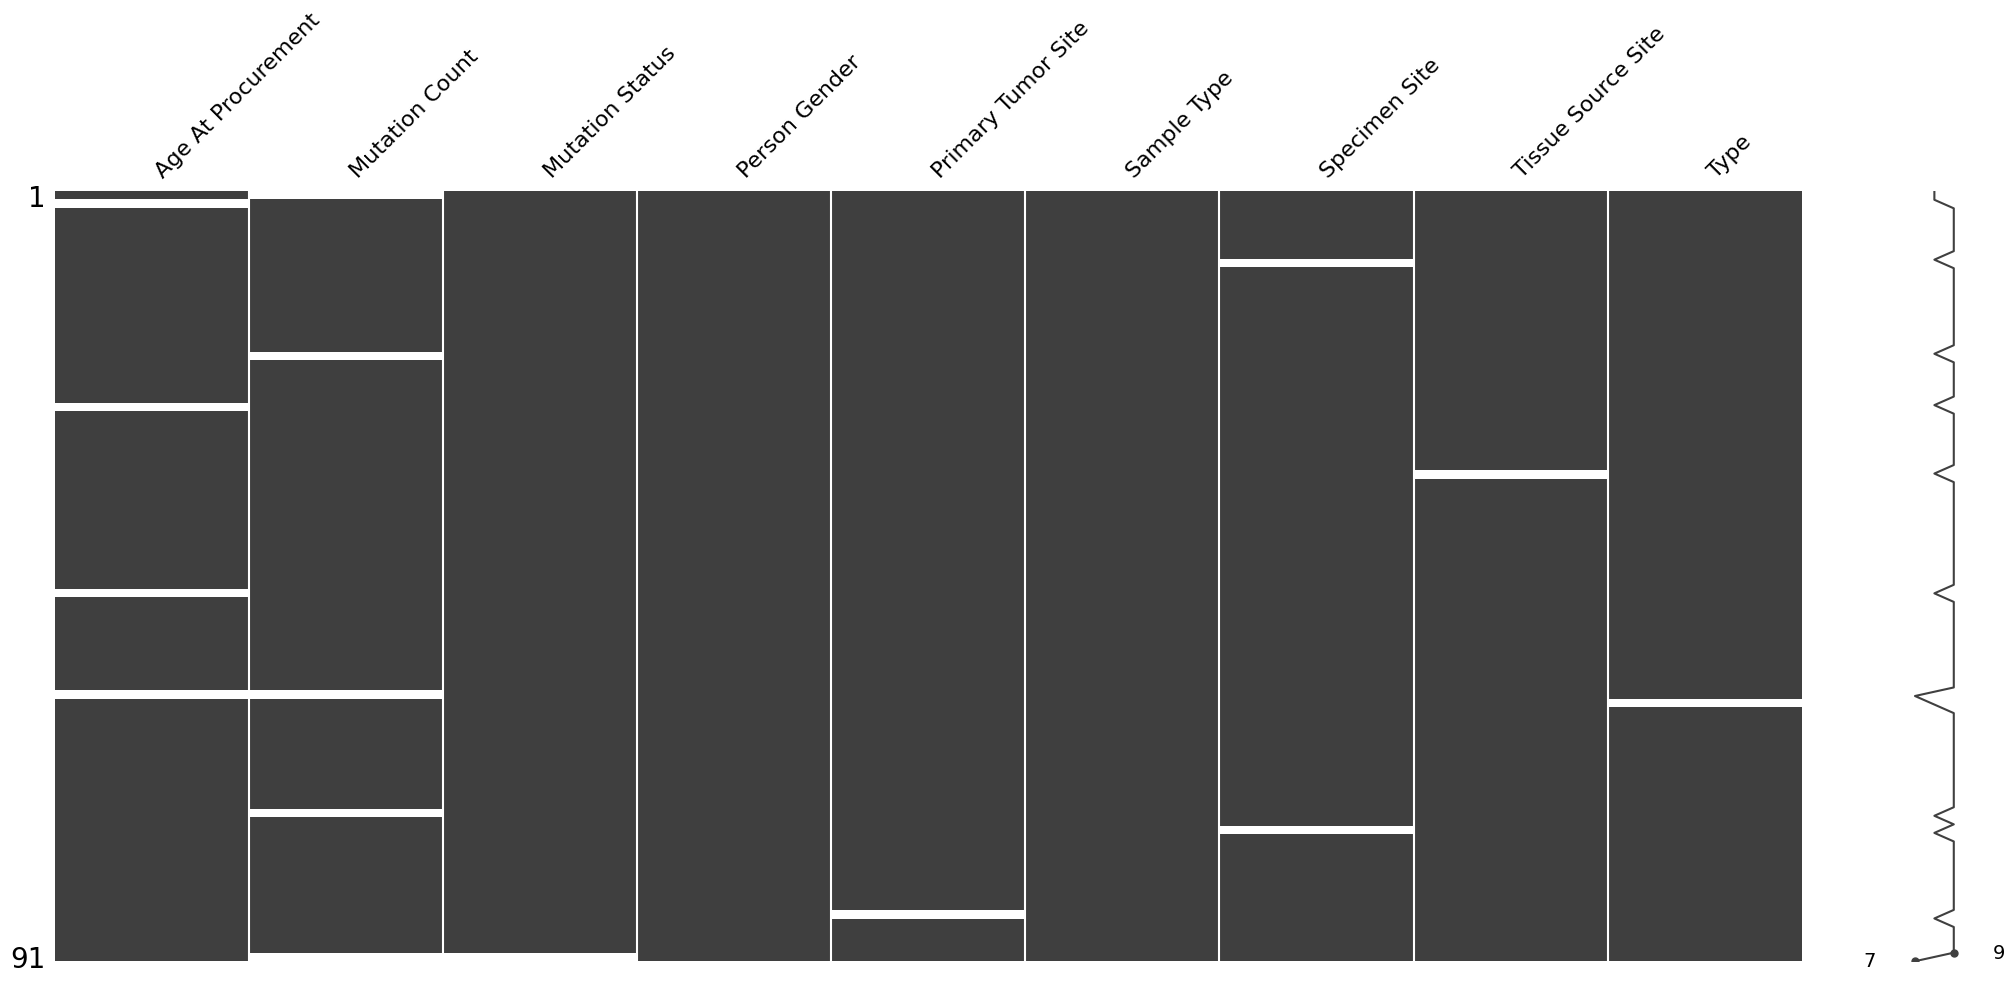

In [ ]:
msno.matrix(df)

<Axes: >

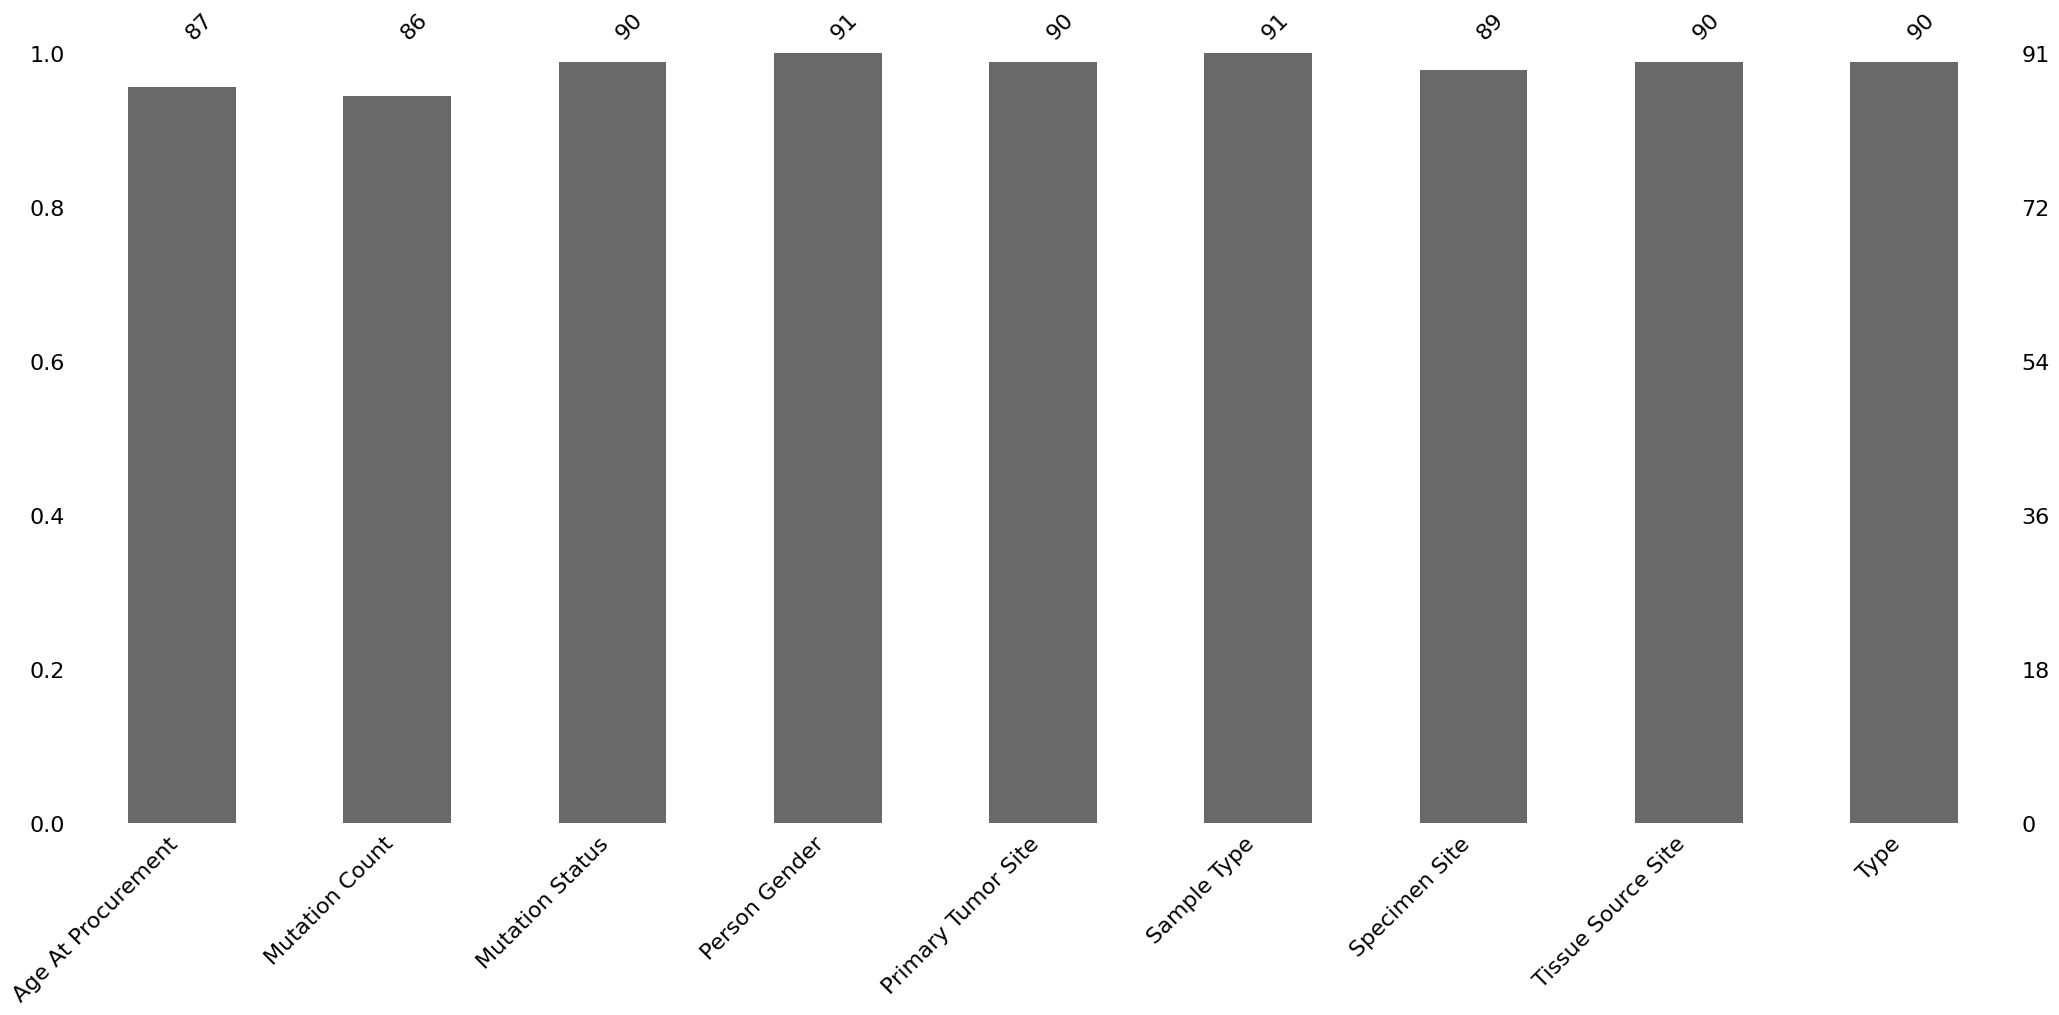

In [ ]:
msno.bar(df)

## Limpieza de datos
Podemos borrar los nulos porque no son mas del 5%
91 * 0.05 = 4.55
91 - 5 = 86

In [ ]:
df['Age At Procurement'].fillna(df['Age At Procurement'].median(), inplace=True)
df['Mutation Count'].fillna(df['Mutation Count'].median(), inplace=True)
df.dropna(inplace=True)

df.isnull().sum()

Age At Procurement    0
Mutation Count        0
Mutation Status       0
Person Gender         0
Primary Tumor Site    0
Sample Type           0
Specimen Site         0
Tissue Source Site    0
Type                  0
dtype: int64

<Axes: >

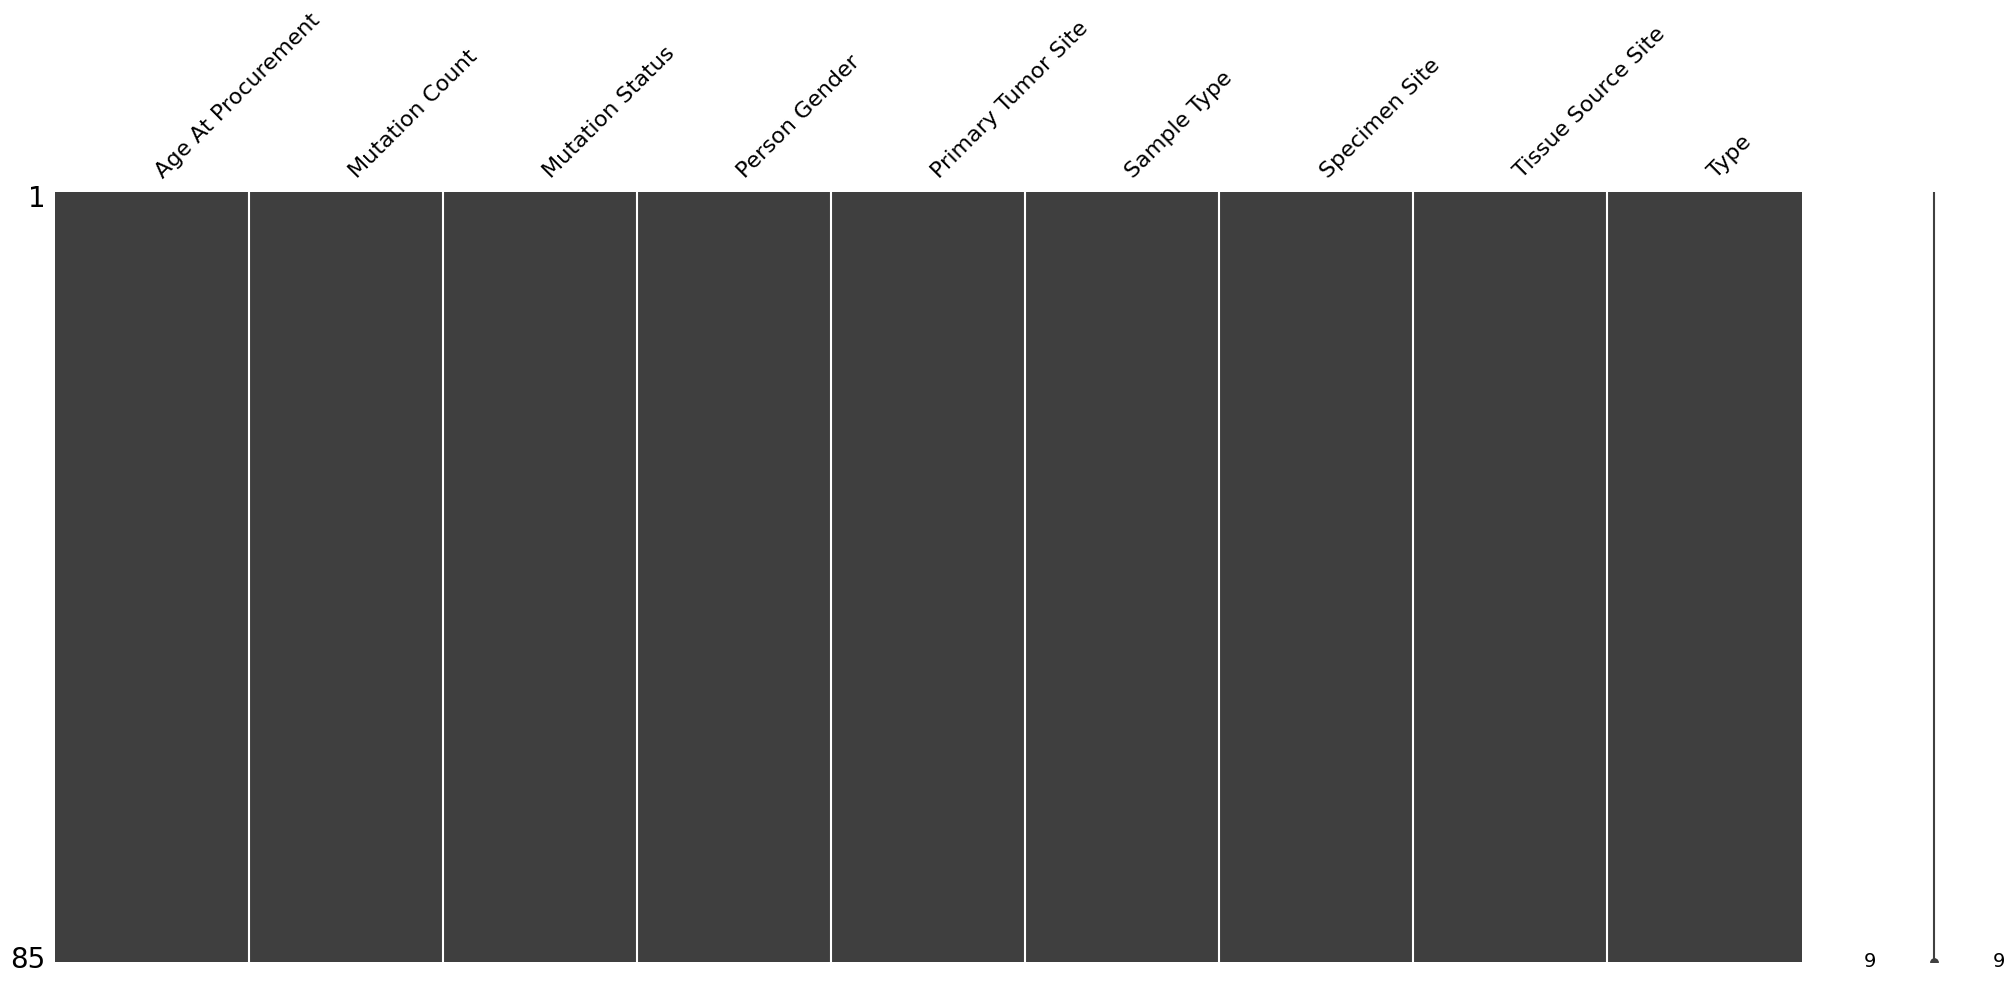

In [ ]:
msno.matrix(df)

In [ ]:
profile = ProfileReport(df, title='Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
features = ['Age At Procurement',	'Mutation Count',	'ms',	'pg', 'pts','st','ss','tss']
label = 'Type'

In [ ]:
le21 = LabelEncoder()
df['ms'] = le21.fit_transform(df['Mutation Status'])
dump(le21, 'le21.joblib')

le22 = LabelEncoder()
df['pg'] = le22.fit_transform(df['Person Gender'])
dump(le22, 'le22.joblib')

le23 = LabelEncoder()
df['pts'] = le23.fit_transform(df['Primary Tumor Site'])
dump(le23, 'le23.joblib')

le24 = LabelEncoder()
df['st'] = le24.fit_transform(df['Sample Type'])
dump(le24, 'le24.joblib')

le25 = LabelEncoder()
df['ss'] = le25.fit_transform(df['Specimen Site'])
dump(le25, 'le25.joblib')

le26 = LabelEncoder()
df['tss'] = le26.fit_transform(df['Tissue Source Site'])
dump(le26, 'le26.joblib')

le27tipo = LabelEncoder()
df['tipo'] = le27tipo.fit_transform(df['Type'])
dump(le27tipo, 'le27tipo.joblib')

In [ ]:
df.head()

,Age At Procurement,Mutation Count,Mutation Status,Person Gender,Primary Tumor Site,Sample Type,Specimen Site,Tissue Source Site,Type,ms,pg,pts,st,ss,tss,tipo
0,85.0,109.0,WT,Male,head/neck,primary,head/neck,Tumor,sun-exposed,13,1,4,1,5,1,2
1,64.0,288.0,NRAS-Q61R,Female,extremity,metastasis,extremity,Cell line,sun-exposed,12,0,1,0,2,0,2
2,65.0,155.0,BRAF-V600K,Male,head/neck,metastasis,trunk,Tumor,sun-exposed,2,1,4,0,14,1,2
3,68.0,1.0,WT,Male,head/neck,primary,head/neck,Tumor,sun-exposed,13,1,4,1,5,1,2
4,58.0,2.0,WT,Female,head/neck,primary,head/neck,Tumor,sun-exposed,13,0,4,1,5,1,2


In [ ]:
df.tipo.value_counts()

2    54
0    11
3    11
4     5
1     4
Name: tipo, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df[features], df.tipo, test_size=0.20, random_state=0, stratify=df.tipo)

class_weights = len(ytrain) / (len(np.unique(ytrain)) * np.bincount(ytrain))
sample_weights = class_weights[ytrain]

In [ ]:
print(xtrain.shape) # (68, 8) -> 0.80
print(xtest.shape) # (17, 8) -> 0.20
print(len(ytrain)) # 68
print(len(ytest)) # 17

(68, 8)
(17, 8)
68
17


In [ ]:
ytrain.value_counts()

2    43
3     9
0     9
4     4
1     3
Name: tipo, dtype: int64

# SVC Maquina de soporte vectorial

In [ ]:
svm = SVC(probability=True, class_weight='balanced')
modelo = svm.fit(xtrain, ytrain) # sample_weight=sample_weights
prediccion = modelo.predict(xtest)

In [ ]:
prediccion
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

1 0
2 2
3 2
0 2
4 2
1 2
3 2
1 2
4 3
1 0
1 2
2 2
0 1
0 4
2 3
3 2
2 2


sun-exposed    54
acral          11
unknown        11
uveal           5
mucosal         4
Name: Type, dtype: int64

score:  0.17647058823529413
recall_score:  0.17647058823529413
accuracy_score:  0.17647058823529413
f1_score:  0.17647058823529413

classification_report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.27      0.75      0.40         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.18        17
   macro avg       0.05      0.15      0.08        17
weighted avg       0.06      0.18      0.09        17



<Axes: >

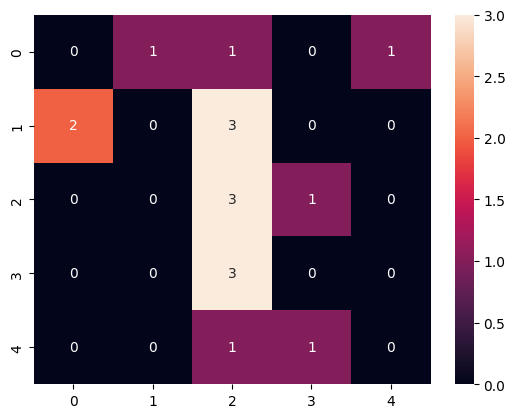

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

In [ ]:
data = {'Age At Procurement':70.5,	'Mutation Count':201.2,	'ms':8,	'pg':0, 'pts':2, 'st':1, 'ss':9, 'tss':0}

p = pd.DataFrame(data, index=[0])
npm = modelo.predict(p)
l27tipo.inverse_transform(npm.tolist())
# datadrif si alucina

array(['sun-exposed'], dtype=object)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crea el modelo RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, class_weight='balanced')
modelo.fit(xtrain, ytrain) #sample_weight=sample_weights
prediccion = modelo.predict(xtest)

sun-exposed    54
acral          11
unknown        11
uveal           5
mucosal         4
Name: Type, dtype: int64

score:  0.8823529411764706
recall_score:  0.8823529411764706
accuracy_score:  0.8823529411764706
f1_score:  0.8823529411764706

classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       0.91      0.91      0.91        11
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1

    accuracy                           0.88        17
   macro avg       0.78      0.72      0.74        17
weighted avg       0.94      0.88      0.91        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

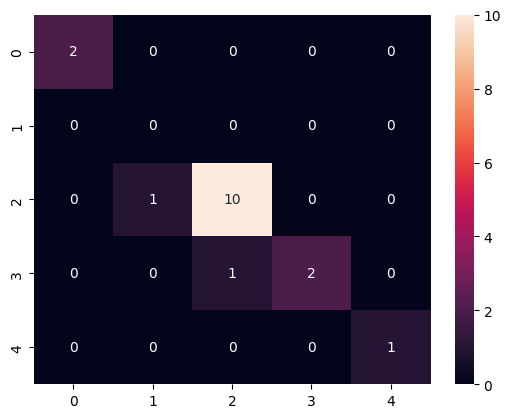

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

## Arboles de decicion
clasificacion basados en reglas
#### Ventajas
- puede resolver problemas no lineales

#### Desventajas
- overfiting
- pueden ser caros

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [ ]:
dtc = DecisionTreeClassifier(max_depth=6, class_weight='balanced')
modelo = dtc.fit(xtrain, ytrain) # sample_weight=sample_weights
prediccion = modelo.predict(xtest)

In [ ]:
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

0 0
2 2
2 2
2 2
2 2
2 2
2 2
0 2
3 3
1 0
2 2
3 2
0 1
4 4
3 3
2 2
2 2


sun-exposed    54
acral          11
unknown        11
uveal           5
mucosal         4
Name: Type, dtype: int64

score:  0.7647058823529411
recall_score:  0.7647058823529411
accuracy_score:  0.7647058823529411
f1_score:  0.7647058823529412
classification_report: 
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.00      0.00      0.00         1
           2       0.82      1.00      0.90         9
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1

    accuracy                           0.76        17
   macro avg       0.66      0.60      0.62        17
weighted avg       0.76      0.76      0.75        17



<Axes: >

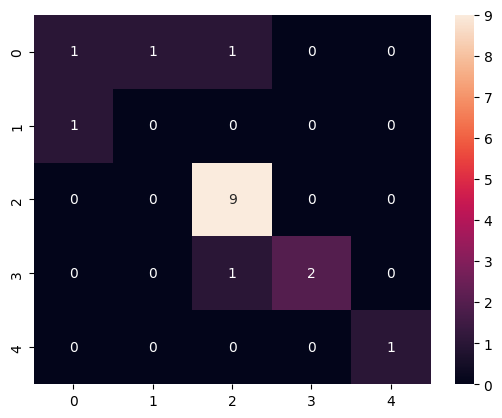

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

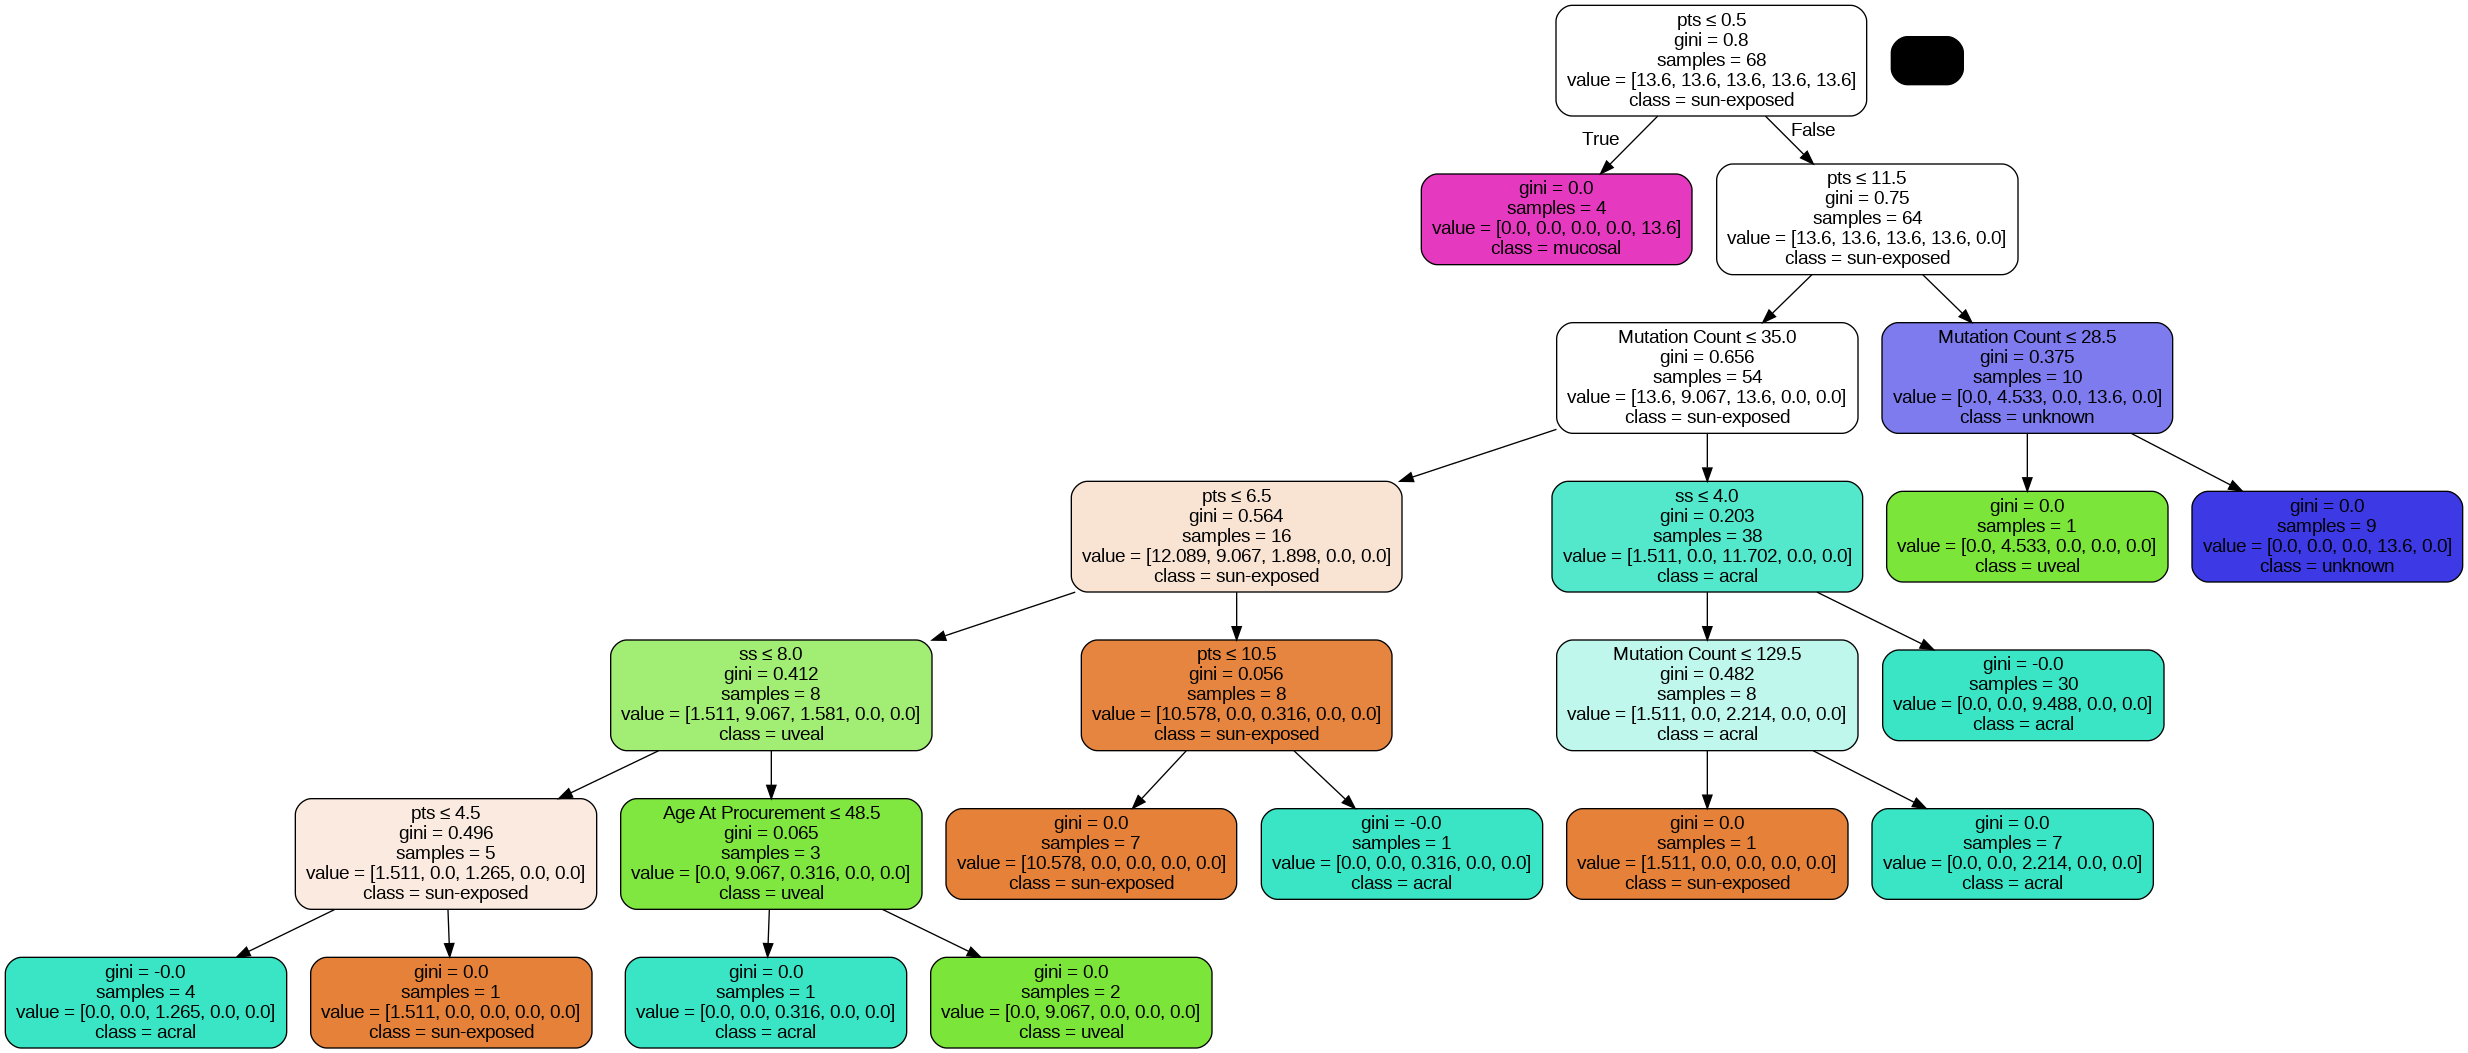

In [ ]:
dot_data = export_graphviz(modelo, out_file=None, feature_names=features, class_names=df[label].unique(), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
modelo = gbc.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)
dump(modelo,'modelo2.joblib')

['modelo2.joblib']

sun-exposed    54
acral          11
unknown        11
uveal           5
mucosal         4
Name: Type, dtype: int64

score:  0.8823529411764706
recall_score:  0.8823529411764706
accuracy_score:  0.8823529411764706
f1_score:  0.8823529411764706
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0
           2       0.91      1.00      0.95        10
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1

    accuracy                           0.88        17
   macro avg       0.78      0.67      0.71        17
weighted avg       0.95      0.88      0.90        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

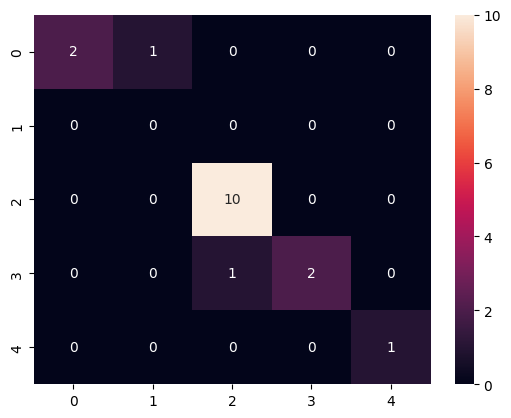

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Crea el modelo Naive Bayes (en este caso, Gaussian Naive Bayes)
modelo = GaussianNB()

# Entrena el modelo con los datos de entrenamiento
modelo.fit(xtrain, ytrain, sample_weight=sample_weights)

# Realiza predicciones en el conjunto de prueba
predictions = modelo.predict(xtest)

sun-exposed    54
acral          11
unknown        11
uveal           5
mucosal         4
Name: Type, dtype: int64

score:  0.6470588235294118
recall_score:  0.8823529411764706
accuracy_score:  0.8823529411764706
f1_score:  0.8823529411764706
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0
           2       0.91      1.00      0.95        10
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1

    accuracy                           0.88        17
   macro avg       0.78      0.67      0.71        17
weighted avg       0.95      0.88      0.90        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

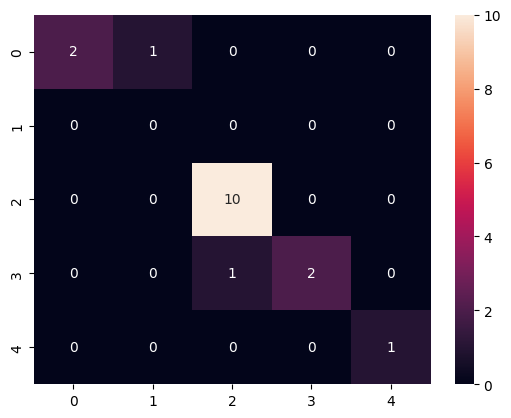

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

|    parametro    |   SVM     | randomForest | DecisionTree |GradientBoosting|naive bayes|
|--------------|-----------|--------------|--------------|----------------|-----------|
|   accuracy   |   0.18    |     0.88     |    0.76      |     0.88       |   0.88         |


El mejor clasificador fue GradientBoostingClassifier random forest y naive bayes, le sigue DecisionTreeClassifier y el peor fue SVC